Hear Disease Predictions using LogiscticRegression

In [100]:
import pandas as pd
import numpy as npy

df = pd.read_csv('framingham.csv')

Preparing the Dataset

In [101]:
df.drop(columns=['education'], inplace=True, axis=1) # ye education wale col ko drop kar dega
df.rename(columns={'male': "sex_male"}, inplace=True)
df.dropna(axis=0, inplace=True)

print(df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [102]:
X = npy.asanyarray(df[
  ['age', 'sex_male', 'cigsPerDay', 'prevalentStroke', 'diabetes', 'BMI', 'heartRate', 'glucose']
])

y = npy.asanyarray(df['TenYearCHD'])

print(X.shape, y.shape)

(3751, 8) (3751,)


In [103]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

Applying EDA for better understanding the data

/tmp/ipykernel_10040/4031918958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sborn.countplot(x='TenYearCHD', data=df, palette='BuGn_r')


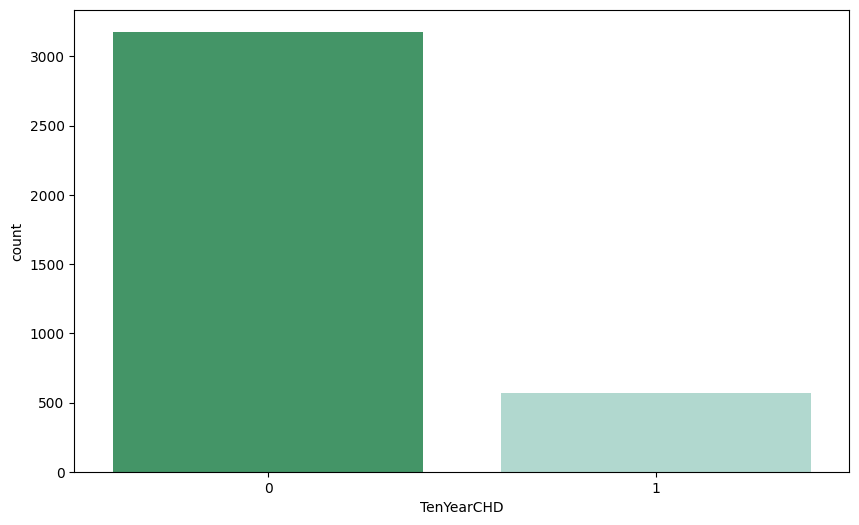

In [105]:
import matplotlib.pyplot as plt
import seaborn as sborn

plt.figure(figsize=(10, 6))
sborn.countplot(x='TenYearCHD', data=df, palette='BuGn_r')
plt.show()

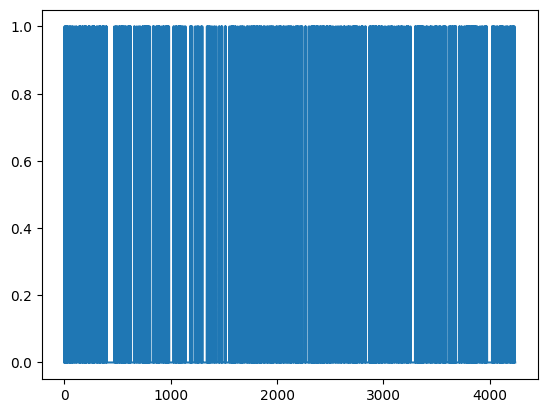

In [106]:
tenYearCHD = df['TenYearCHD'].plot()
plt.show()

Now, we will apply logisctic regression model

In [107]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score

print("Accuracy of the classifier model: ", accuracy_score(y_test, y_pred))

Accuracy of the classifier model:  0.8419182948490231


In [109]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       951
           1       0.42      0.05      0.08       175

    accuracy                           0.84      1126
   macro avg       0.64      0.52      0.50      1126
weighted avg       0.78      0.84      0.78      1126



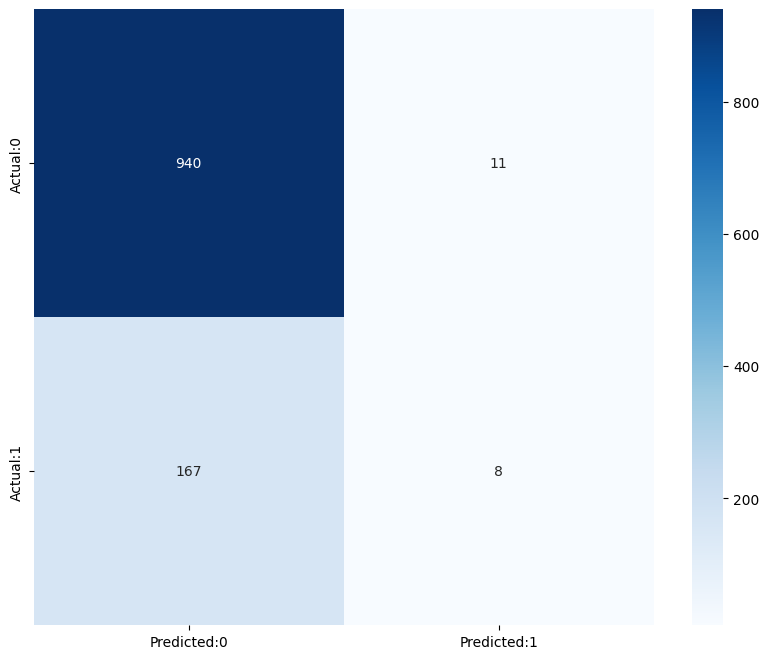

In [110]:
matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(
  matrix,
  columns=['Predicted:0', 'Predicted:1'],
  index=['Actual:0', 'Actual:1']
)

plt.figure(figsize=(10, 8))
sborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()
